In [27]:
from datasets import load_dataset
#access locaclly stored dataset in this path testing_for_error/asking_armor_data.json and is a json file

train_dataset = load_dataset("json", data_files="dataset_final_results/stratified_train.json")
val_dataset = load_dataset("json", data_files="dataset_final_results/stratified_val.json")
test_dataset = load_dataset("json", data_files="dataset_final_results/stratified_test.json")

In [7]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['Response_to', 'Race', 'Equipment', 'Condition', 'Result', 'Line_of_dialogue', 'Location', 'Event', 'Dialogue', 'Speaker', 'Tone'],
        num_rows: 1417
    })
})

In [8]:
val_dataset

DatasetDict({
    train: Dataset({
        features: ['Response_to', 'Race', 'Equipment', 'Condition', 'Result', 'Line_of_dialogue', 'Location', 'Event', 'Dialogue', 'Speaker', 'Tone'],
        num_rows: 175
    })
})

In [9]:
test_dataset

DatasetDict({
    train: Dataset({
        features: ['Response_to', 'Race', 'Equipment', 'Condition', 'Result', 'Line_of_dialogue', 'Location', 'Event', 'Dialogue', 'Speaker', 'Tone'],
        num_rows: 181
    })
})

In [10]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

In [37]:
def formatting_func(example):

    # if  example['Monologue'] is not None:
    #     return f"""
# In the following text, there is a description about introductory monologues in video games. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the title of the current game will always be enclosed inside " ", the monologue will always be enclosed inside $ $, and the context will be enclosed inside # #.
# 
# <START>
# In video games, sometimes there is an introductory monologue delivered by a Speaker. The Speaker can either be an unknown narrator or a character in the game, and they introduce the Player to the world, the story, and the setting of the game. 
# 
# This monologue is based on the game's setting, world, story, and the Player's role in the game. Here is some context describing these elements:
# 
# #{example['Context']}#
    
    
#For the game "{example['Game']}", the introductory monologue is as follows:
# 
# ${example['Monologue']}$
# 
# <END>"""



    description = f"""The following text elaborates on what line of dialogue is used by an NPC in a certain event. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER> and the line used will be enclosed within <LINE> and </LINE>.

"""
    if example['Event'] == "Greeting":

        description = f"""The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>.

"""
    elif example['Event'] == "NPCs fighting over a Player's dropped item":

        description = f"""The following text describes an exchange where multiple NPCs are fighting over a Player's dropped item and one of them uses a line of dialogue. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the number of the current spoken line in the dialogue will be enclosed within <NUMBER> and </NUMBER>.

"""
    elif example['Condition'] == "in combat":

        description = f"""The following text elaborates on which line of dialogue a friendly NPC uses when it is in combat. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>,the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and  the condition will be enclosed within <CONDITION> and </CONDITION>.

"""
    elif example['Result'] is not None:

        description = f"""The following text text elaborates on which line of dialogue is used by an NPC when the Player character tries to persuade them. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>,the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE> and the result of the event will be enclosed within <RESULT> and </RESULT> .

"""
    elif example['Race'] is not None:

        description = f"""The following text describes the reaction of a Guard based on the Player's race. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, the race of the Player will be enclosed within <RACE> and </RACE>, and the condition, if there is one, will be enclosed within <CONDITION> and </CONDITION>.

"""
    elif example['Equipment'] is not None:

        description = f"""The following text describes the reaction of a Guard based on the Player's equipment. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, the equipment of the Player will be enclosed within <EQUIPMENT> and </EQUIPMENT>, and the condition, if there is one, will be enclosed within <CONDITION> and </CONDITION>.

"""
    elif example['Location'] is not None:

        description = f"""The following text describes a special interaction of a Guard based on the Player's location. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, the location of the Player will be enclosed within <LOCATION> and </LOCATION>, and the condition, if there is one, will be enclosed within <CONDITION> and </CONDITION>.

"""

    elif example['Response_to'] is not None:

        description = f"""The following text describes a part of a dialogue between and NPC and the Player in the case of a certain event. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the line that the speaker responds to, will be enclosed within <RESPONSE> and </RESPONSE>.

"""
    elif example['Condition'] is not None:

        description = f"""The following text elaborates on a line of dialogue used by an NPC in a certain event under a condition. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the condition, will be enclosed within <CONDITION> and </CONDITION>.

"""


    if example['Speaker'] == "Any":

        npc_type = "the NPC, that is of any type"

    elif "Guard" in example['Speaker']:

        npc_type = f'the {example["Speaker"]}'

    elif "trainer" in example['Event']:

        npc_type = f"""the trainer NPC, that is named {example['Speaker']}"""

    elif example['Speaker'] == "Housecarl":

        npc_type = "the Housecarl"

    else:

        npc_type = f'the NPC, that is the type {example["Speaker"]}'



    if example['Event'] == "Greeting":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>{example['Event']}</EVENT>, between an NPC and the Player character, <SPEAKER>{npc_type}</SPEAKER> greets the Player, in a <TONE>{example['Tone']}</TONE> tone, using the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""


    if example['Event'] == "Goodbye":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>{example['Event']}</EVENT>, between an NPC and the Player character,<SPEAKER>{npc_type}</SPEAKER> tells their goodbyes to the Player using the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""


    if example['Event'] == "NPCs fighting over a Player's dropped item":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>{example['Event']}</EVENT>, there can be up to 5 different NPCs arguing over an item that the Player character dropped and up to 2 bystander NPCs commenting on the situation. Up to five lines of dialogue can be exchanged between up to five different NPCs that are arguing and up to two lines of bystander dialogue can be used by up to two different bystander NPCs, meaning that the conversation ends after a maximum of 7 lines of dialogue have been said. In this case one of the NPCs that takes part in the arguing and is <SPEAKER>{npc_type}</SPEAKER>, says, as the <NUMBER>{example['Line_of_dialogue']}</NUMBER> line of the dialogue, the following line: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Event'] == "NPC asking for the Player's dropped armor":

        if example['Speaker'] == "Player":
            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of an <EVENT>{example['Event']}</EVENT>, there is a conversation between the Player character and an NPC about the Player's dropped item.
In this case in response to the NPC's previous line of dialogue: <RESPONSE>{example['Response_to']}</RESPONSE>,the <SPEAKER>Player</SPEAKER> character uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

        if example['Response_to'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of an <EVENT>{example['Event']}</EVENT> there is a conversation between the Player character and an NPC about the Player's dropped item.
In this case in response to the Player character's previous line of dialogue: <RESPONSE>{example['Response_to']}</RESPONSE>, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""
        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of an <EVENT>{example['Event']}</EVENT> there is a conversation between the Player character and an NPC about the Player's dropped item.
In this case to initiate a conversation about the Player's dropped item, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Condition'] == "in combat":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when the Player character and a friendly NPC are <CONDITION>{example['Condition']}</CONDITION>, when <EVENT>{example['Event']}</EVENT>,<SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Result'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when the Player character tries to check if an NPC of any type can be persuaded, when <EVENT>{example['Event']}</EVENT> and as a result </RESULT>{example['Result']}<RESULT>, the <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Event'] == "an NPC spots the Player character having an amulet of mara":

        if example['Speaker'] == "Player":

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when <EVENT>{example['Event']}</EVENT> an interaction begins between the two about the possibility of marriage.
In this case in response to the the NPC's previous dialogue line: <RESPONSE>{example['Response_to']}</RESPONSE>, the <SPEAKER>Player</SPEAKER> character uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

        if example['Response_to'] is None:

            return description +  f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when <EVENT>{example['Event']}</EVENT> an interaction begins between the two about the possibility of marriage.
In this case to initiate the conversation about marriage, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when <EVENT>{example['Event']}</EVENT> an interaction begins between the two about the possibility of marriage.
In this case in response to the the Player's previous dialogue line: <RESPONSE>{example['Response_to']}</RESPONSE>, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Race'] is not None:

        if example['Condition'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the race of the Player character, in the case of <EVENT>{example['Event']}</EVENT>, if the Player's race is <RACE>{example['Race']}</RACE> and <CONDITION>{example['Condition']}</CONDITION>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the race of the Player character, so in the case of <EVENT>{example['Event']}</EVENT>, if the Player's race is <RACE>{example['Race']}</RACE>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Equipment'] is not None:

        if example['Condition'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the equipment the Player character is holding or has equipped, so when in the case of a <EVENT>{example['Event']}</EVENT> and <CONDITION>{example['Condition']}</CONDITION>, to react to the Player's <EQUIPMENT>{example['Equipment']}</EQUIPMENT>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the equipment the Player character is holding or has equipped, so when in the case of a <EVENT>{example['Event']}</EVENT>, to react to the Player's <EQUIPMENT>{example['Equipment']}</EQUIPMENT>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Location'] is not None:

        if example['Condition'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, <EVENT>Town Guards have special interactions with the Player character that are location based</EVENT>, meaning that the Guards sometimes interact with the Player using town specific dialogue.
In this case in the town of <LOCATION>{example['Location']}</LOCATION> and on the condition that <CONDITION>{example['Condition']}</CONDITION>, a <SPEAKER>Guard</SPEAKER>, when the Player character interacts with them, uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, <EVENT>Town Guards have special interactions with the Player character that are location based</EVENT>, meaning that the Guards sometimes interact with the Player using town specific dialogue.
In this case in the town of <LOCATION>{example['Location']}</LOCATION>, a <SPEAKER>Guard</SPEAKER>, when the Player character interacts with them, uses the following line of dialogue: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    if example['Condition'] is not None:

          return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>{example['Event']}</EVENT> and on the condition that <CONDITION>{example['Condition']}</CONDITION>, <SPEAKER>{npc_type}</SPEAKER>, says the following line to the Player character: <LINE>{example['Dialogue']}</LINE>.
<END>"""

    return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>{example['Event']}</EVENT>, <SPEAKER>{npc_type}</SPEAKER>, says the following line to the Player character: <LINE>{example['Dialogue']}</LINE>.
<END>"""

In [30]:
# Explicitly setting the token
import os
os.environ["HF_TOKEN"] = ""

In [31]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, AutoConfig
config = AutoConfig.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

In [32]:
base_model_id = "mistralai/Mistral-7B-Instruct-v0.2"

In [33]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [34]:
model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config,config=config)

tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token


`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [38]:
def generate_and_tokenize_prompt(prompt):
    print(formatting_func(prompt))
    return tokenizer(formatting_func(prompt))

In [39]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)

Map:   0%|          | 0/1417 [00:00<?, ? examples/s]

The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>.

<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>Greeting</EVENT>, between an NPC and the Player character, <SPEAKER>the NPC, that is the type MaleSlyCynical</SPEAKER> greets the Player, in a <TONE>Friendly</TONE> tone, using the following line of dialogue: <LINE>You and me, we're the only people around who aren't complete fools.</LINE>.
<END>
The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to 

In [40]:
tokenized_val_dataset = val_dataset.map(generate_and_tokenize_prompt)

Map:   0%|          | 0/175 [00:00<?, ? examples/s]

The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>.

<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>Greeting</EVENT>, between an NPC and the Player character, <SPEAKER>the NPC, that is the type MaleDrunk</SPEAKER> greets the Player, in a <TONE>Neutral</TONE> tone, using the following line of dialogue: <LINE>What are you starin' at?</LINE>.
<END>
The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVEN

1592


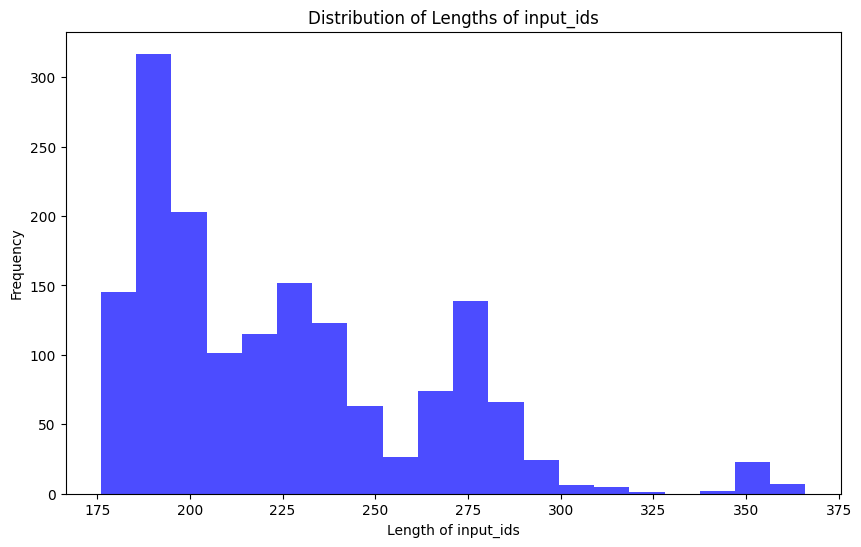

In [41]:
import matplotlib.pyplot as plt


def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset['train']]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset['train']]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [42]:
import numpy as np

lengths = [len(x['input_ids']) for x in tokenized_train_dataset['train']]

print(f"Mean: {np.mean(lengths)}")

# Calculate the 95th percentile
print(f"95th percentile: {np.percentile(lengths, 95)}")

# Calculate the max length
print(f"Max length: {np.max(lengths)}")

Mean: 225.57163020465774
95th percentile: 288.0
Max length: 366


In [43]:
max_length = 366  # This was an appropriate max length for my dataset

def generate_and_tokenize_prompt2(prompt):
    result = tokenizer(
        formatting_func(prompt),
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

In [44]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt2)
tokenized_val_dataset = val_dataset.map(generate_and_tokenize_prompt2)

Map:   0%|          | 0/1417 [00:00<?, ? examples/s]

Map:   0%|          | 0/175 [00:00<?, ? examples/s]

1592


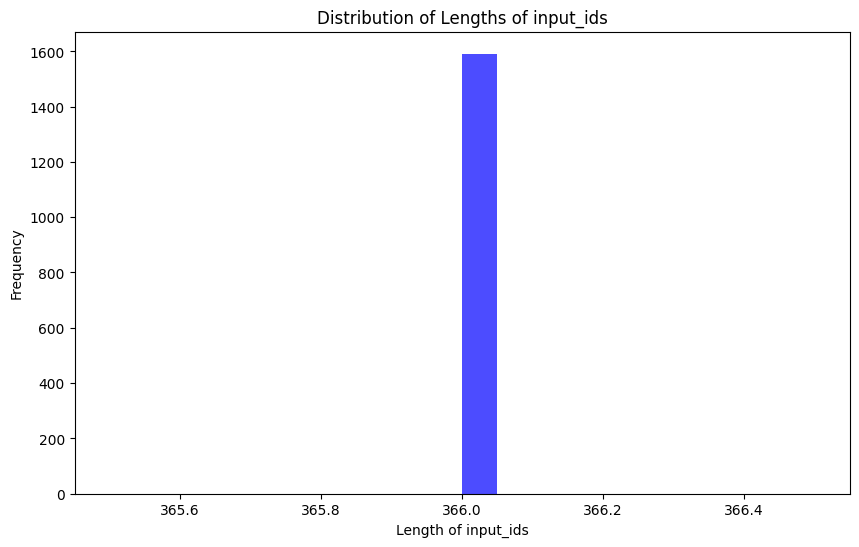

In [45]:
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [54]:
eval_prompt = (f"""The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>. Please fill in the missing dialogue within the <LINE> and </LINE> tags.

<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>Greeting</EVENT>, between an NPC and the Player character, <SPEAKER>FemaleCoward</SPEAKER> greets the Player, in a <TONE>Friendly</TONE> tone, with the following line of dialogue: <LINE> </LINE>.
<END>
""")

In [55]:
# Init an eval tokenizer that doesn't add padding or eos token
eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
)

model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(model.generate(**model_input, max_new_tokens=321, repetition_penalty=1.15)[0],
                                skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>. Please fill in the missing dialogue within the <LINE> and </LINE> tags.

<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>Greeting</EVENT>, between an NPC and the Player character, <SPEAKER>FemaleCoward</SPEAKER> greets the Player, in a <TONE>Friendly</TONE> tone, with the following line of dialogue: <LINE> </LINE>.
<END>
<LINE>"Hello there, traveler! I hope you're having a good day."</LINE>


In [56]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [57]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [58]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )

In [59]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj,"
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    use_rslora=True,
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 65011712 || all params: 3817082880 || trainable%: 1.7031778990347728


In [60]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer):

In [61]:
if torch.cuda.device_count() > 1:  # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

In [62]:
model = accelerator.prepare_model(model)

In [63]:
import transformers
from datetime import datetime

project = "NPC-finetune2"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset["train"],
    eval_dataset=tokenized_val_dataset["train"],
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=746,
        learning_rate=2.5e-8,  # Want a small lr for finetuning
        bf16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,  # When to start reporting loss
        logging_dir="./logs",  # Directory for storing logs
        save_strategy="steps",  # Save the model checkpoint every logging step
        save_steps=50,  # Save checkpoints every 50 steps
        evaluation_strategy="steps",  # Evaluate the model every logging step
        eval_steps=50,  # Evaluate and save checkpoints every 50 steps
        do_eval=True
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

C:\Users\Pumukl\AppData\Local\Programs\Python\Python312\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
C:\Users\Pumukl\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two va

Step,Training Loss,Validation Loss
50,0.300600,0.321790


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325
500,0.139700,0.156682


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325
500,0.139700,0.156682


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325
500,0.139700,0.156682


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325
500,0.139700,0.156682


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325
500,0.139700,0.156682


Step,Training Loss,Validation Loss
50,0.300600,0.321790
100,0.243800,0.271329
150,0.180700,0.232796
200,0.206000,0.199227
250,0.179700,0.180950
300,0.173800,0.177885
350,0.163500,0.167411
400,0.149100,0.162946
450,0.142000,0.160325
500,0.139700,0.156682


KeyboardInterrupt: 

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-Instruct-v0.2"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
)

eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "mistral-NPC-finetune/checkpoint-700")

In [76]:
eval_prompt = (f"""
The following text elaborates on what line of dialogue is used by an NPC in a certain event. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER> and the line used will be enclosed within <LINE> and </LINE>. Generate the missing dialogue line between the <LINE> and </LINE> tags.
    
<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>a Guard reacting to the Player's high skill level in Alchemy</EVENT>, <SPEAKER>the Guard</SPEAKER>, says the following line to the Player character: <LINE> </LINE>.
<END>

Answer:
"""
)
model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=750, repetition_penalty=1.15)[0],
                                skip_special_tokens=True))
    #save the results to a list
    answer = eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=750, repetition_penalty=1.15)[0],
                                skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



The following text elaborates on what line of dialogue is used by an NPC in a certain event. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER> and the line used will be enclosed within <LINE> and </LINE>. Generate the missing dialogue line between the <LINE> and </LINE> tags.
    
<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>a Guard reacting to the Player's high skill level in Alchemy</EVENT>, <SPEAKER>the Guard</SPEAKER>, says the following line to the Player character: <LINE> </LINE>.
<END>

Answer:
<LINE>You got any potions? I could use some.</LINE>.


In [25]:
import re

matches = re.findall(r'<LINE>(.*?)</LINE>', answer)
print(matches[3])

I'm glad you're here.


In [67]:
def evaluation_func(example):

    description = f"""The following text elaborates on what line of dialogue is used by an NPC in a certain event. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER> and the line used will be enclosed within <LINE> and </LINE>. Generate the missing dialogue line between the <LINE> and </LINE> tags.
    
"""
    if example['Event'] == "Greeting":

        description = f"""The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Event'] == "NPCs fighting over a Player's dropped item":

        description = f"""The following text describes an exchange where multiple NPCs are fighting over a Player's dropped item and one of them uses a line of dialogue. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the number of the current spoken line in the dialogue will be enclosed within <NUMBER> and </NUMBER>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Condition'] == "in combat":

        description = f"""The following text elaborates on which line of dialogue a friendly NPC uses when it is in combat. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>,the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and  the condition will be enclosed within <CONDITION> and </CONDITION>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Result'] is not None:

        description = f"""The following text text elaborates on which line of dialogue is used by an NPC when the Player character tries to persuade them. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>,the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE> and the result of the event will be enclosed within <RESULT> and </RESULT>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Race'] is not None:

        description = f"""The following text describes the reaction of a Guard based on the Player's race. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, the race of the Player will be enclosed within <RACE> and </RACE>, and the condition, if there is one, will be enclosed within <CONDITION> and </CONDITION>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Equipment'] is not None:

        description = f"""The following text describes the reaction of a Guard based on the Player's equipment. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, the equipment of the Player will be enclosed within <EQUIPMENT> and </EQUIPMENT>, and the condition, if there is one, will be enclosed within <CONDITION> and </CONDITION>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Location'] is not None:

        description = f"""The following text describes a special interaction of a Guard based on the Player's location. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, the location of the Player will be enclosed within <LOCATION> and </LOCATION>, and the condition, if there is one, will be enclosed within <CONDITION> and </CONDITION>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""

    elif example['Response_to'] is not None:

        description = f"""The following text describes a part of a dialogue between and NPC and the Player in the case of a certain event. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the line that the speaker responds to, will be enclosed within <RESPONSE> and </RESPONSE>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

"""
    elif example['Condition'] is not None:

        description = f"""The following text elaborates on a line of dialogue used by an NPC in a certain event under a condition. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the condition, will be enclosed within <CONDITION> and </CONDITION>. Generate the missing dialogue line between the <LINE> and </LINE> tags.
        
"""


    if example['Speaker'] == "Any":

        npc_type = "the NPC, that is of any type"

    elif "Guard" in example['Speaker']:

        npc_type = f'the {example["Speaker"]}'

    elif "trainer" in example['Event']:

        npc_type = f"""the trainer NPC, that is named {example['Speaker']}"""

    elif example['Speaker'] == "Housecarl":

        npc_type = "the Housecarl"

    else:

        npc_type = f'the NPC, that is the type {example["Speaker"]}'



    if example['Event'] == "Greeting":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>{example['Event']}</EVENT>, between an NPC and the Player character, <SPEAKER>{npc_type}</SPEAKER> greets the Player, in a <TONE>{example['Tone']}</TONE> tone, using the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""


    if example['Event'] == "Goodbye":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>{example['Event']}</EVENT>, between an NPC and the Player character,<SPEAKER>{npc_type}</SPEAKER> tells their goodbyes to the Player using the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""


    if example['Event'] == "NPCs fighting over a Player's dropped item":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>{example['Event']}</EVENT>, there can be up to 5 different NPCs arguing over an item that the Player character dropped and up to 2 bystander NPCs commenting on the situation. Up to five lines of dialogue can be exchanged between up to five different NPCs that are arguing and up to two lines of bystander dialogue can be used by up to two different bystander NPCs, meaning that the conversation ends after a maximum of 7 lines of dialogue have been said. In this case one of the NPCs that takes part in the arguing and is <SPEAKER>{npc_type}</SPEAKER>, says, as the <NUMBER>{example['Line_of_dialogue']}</NUMBER> line of the dialogue, the following line: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Event'] == "NPC asking for the Player's dropped armor":

        if example['Speaker'] == "Player":
            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of an <EVENT>{example['Event']}</EVENT>, there is a conversation between the Player character and an NPC about the Player's dropped item.
In this case in response to the NPC's previous line of dialogue: <RESPONSE>{example['Response_to']}</RESPONSE>,the <SPEAKER>Player</SPEAKER> character uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        if example['Response_to'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of an <EVENT>{example['Event']}</EVENT> there is a conversation between the Player character and an NPC about the Player's dropped item.
In this case in response to the Player character's previous line of dialogue: <RESPONSE>{example['Response_to']}</RESPONSE>, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of an <EVENT>{example['Event']}</EVENT> there is a conversation between the Player character and an NPC about the Player's dropped item.
In this case to initiate a conversation about the Player's dropped item, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE></LINE>.
<END>

Answer:
"""

    if example['Condition'] == "in combat":

        return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when the Player character and a friendly NPC are <CONDITION>{example['Condition']}</CONDITION>, when <EVENT>{example['Event']}</EVENT>,<SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Result'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when the Player character tries to check if an NPC of any type can be persuaded, when <EVENT>{example['Event']}</EVENT> and as a result </RESULT>{example['Result']}<RESULT>, the <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Event'] == "an NPC spots the Player character having an amulet of mara":

        if example['Speaker'] == "Player":

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when <EVENT>{example['Event']}</EVENT> an interaction begins between the two about the possibility of marriage.
In this case in response to the the NPC's previous dialogue line: <RESPONSE>{example['Response_to']}</RESPONSE>, the <SPEAKER>Player</SPEAKER> character uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        if example['Response_to'] is None:

            return description +  f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when <EVENT>{example['Event']}</EVENT> an interaction begins between the two about the possibility of marriage.
In this case to initiate the conversation about marriage, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, when <EVENT>{example['Event']}</EVENT> an interaction begins between the two about the possibility of marriage.
In this case in response to the the Player's previous dialogue line: <RESPONSE>{example['Response_to']}</RESPONSE>, <SPEAKER>{npc_type}</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Race'] is not None:

        if example['Condition'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the race of the Player character, in the case of <EVENT>{example['Event']}</EVENT>, if the Player's race is <RACE>{example['Race']}</RACE> and <CONDITION>{example['Condition']}</CONDITION>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the race of the Player character, so in the case of <EVENT>{example['Event']}</EVENT>, if the Player's race is <RACE>{example['Race']}</RACE>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Equipment'] is not None:

        if example['Condition'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the equipment the Player character is holding or has equipped, so when in the case of a <EVENT>{example['Event']}</EVENT> and <CONDITION>{example['Condition']}</CONDITION>, to react to the Player's <EQUIPMENT>{example['Equipment']}</EQUIPMENT>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, Town Guards have special reactions to the equipment the Player character is holding or has equipped, so when in the case of a <EVENT>{example['Event']}</EVENT>, to react to the Player's <EQUIPMENT>{example['Equipment']}</EQUIPMENT>, the <SPEAKER>Guard</SPEAKER> uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Location'] is not None:

        if example['Condition'] is not None:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, <EVENT>Town Guards have special interactions with the Player character that are location based</EVENT>, meaning that the Guards sometimes interact with the Player using town specific dialogue.
In this case in the town of <LOCATION>{example['Location']}</LOCATION> and on the condition that <CONDITION>{example['Condition']}</CONDITION>, a <SPEAKER>Guard</SPEAKER>, when the Player character interacts with them, uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

        else:

            return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, <EVENT>Town Guards have special interactions with the Player character that are location based</EVENT>, meaning that the Guards sometimes interact with the Player using town specific dialogue.
In this case in the town of <LOCATION>{example['Location']}</LOCATION>, a <SPEAKER>Guard</SPEAKER>, when the Player character interacts with them, uses the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
"""

    if example['Condition'] is not None:

          return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>{example['Event']}</EVENT> and on the condition that <CONDITION>{example['Condition']}</CONDITION>, <SPEAKER>{npc_type}</SPEAKER>, says the following line to the Player character: <LINE> </LINE>.
<END>

Answer:
"""

    return description + f"""<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of <EVENT>{example['Event']}</EVENT>, <SPEAKER>{npc_type}</SPEAKER>, says the following line to the Player character: <LINE> </LINE>.
<END>

Answer:
"""

In [68]:
import pandas as pd
 # Create an evaluation data frame for each example in the test dataset
eval_df = pd.DataFrame(test_dataset['train'])
eval_df['description'] = eval_df.apply(evaluation_func, axis=1)

# create a new dataframe from the Dialogue column of the eval_df
test_dialogues = eval_df['Dialogue']

eval_df = eval_df[['description']]

In [69]:
eval_df

,description
0,The following text describes a greeting exchan...
1,The following text describes a greeting exchan...
2,The following text describes a greeting exchan...
3,The following text describes a greeting exchan...
4,The following text describes a greeting exchan...
...,...
176,The following text describes a special interac...
177,The following text describes a special interac...
178,The following text describes a special interac...
179,The following text describes a special interac...


In [ ]:
#for each element in the eval_df, generate an answer from the model
answers = []

In [77]:
#get the answer for the first dialogue
model_input = eval_tokenizer(eval_df['description'][0], return_tensors="pt").to("cuda")
ft_model.eval()
with torch.no_grad():
    answer = eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=750, repetition_penalty=1.15)[0],
                                skip_special_tokens=True)
    answers.append(answer)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [78]:
print(answer)

The following text describes a greeting exchange between the Player and an NPC. The text will be enclosed within <START> and <END>. There are specific rules that apply only to the text: the event will be enclosed within <EVENT> and </EVENT>, the type of speaker will be enclosed within <SPEAKER> and </SPEAKER>, the line used will be enclosed within <LINE> and </LINE>, and the tone of the line will be enclosed within <TONE> and </TONE>. Generate the missing dialogue line between the <LINE> and </LINE> tags.

<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>Greeting</EVENT>, between an NPC and the Player character, <SPEAKER>the NPC, that is the type FemaleCoward</SPEAKER> greets the Player, in a <TONE>Friendly</TONE> tone, using the following line of dialogue: <LINE> </LINE>.
<END>

Answer:
<START>
In the world of Skyrim from the game Elder Scrolls V, in the event of a <EVENT>Greeting</EVENT>, between an NPC and the Player character, <SPEAKER>the NPC,

In [86]:
#make the model generate answers for all the dialogues in the eval_df
answers= []
for i in range(0, len(eval_df)):
    model_input = eval_tokenizer(eval_df['description'][i], return_tensors="pt").to("cuda")
    ft_model.eval()
    with torch.no_grad():
        answer = eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=1250, repetition_penalty=1.15)[0],
                                skip_special_tokens=True)
        answers.append(answer)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for o

In [87]:
#make the answers into a dataframe
answers_df = pd.DataFrame(answers, columns=['Dialogue'])
#export the answers to an excel file
answers_df.to_excel('answers.xlsx', index=False)

In [71]:
#make the answers into a dataframe
answers_df = pd.DataFrame(answers, columns=['Dialogue'])

In [112]:
#import the answers from the excel file with a column name Dialogue
answers_df = pd.read_excel('answers.xlsx', names=['Dialogue'])

In [113]:
answers_df

,Dialogue
0,The following text describes a greeting exchan...
1,The following text describes a greeting exchan...
2,The following text describes a greeting exchan...
3,The following text describes a greeting exchan...
4,The following text describes a greeting exchan...
...,...
176,The following text describes a special interac...
177,The following text describes a special interac...
178,The following text describes a special interac...
179,The following text describes a special interac...


In [114]:
#for each line in the answers_df, keep only the text after the Answer: tag
answers_df['Dialogue'] = answers_df['Dialogue'].str.split('Answer:').str[1]

In [115]:
answers_df

,Dialogue
0,\n<START>\nIn the world of Skyrim from the gam...
1,\n<START>\nIn the world of Skyrim from the gam...
2,\n<START>\nIn the world of Skyrim from the gam...
3,\n<START>\nIn the world of Skyrim from the gam...
4,\n<START>\nIn the world of Skyrim from the gam...
...,...
176,"\nThe Guard says: ""You should talk to the Jarl..."
177,"\nThe Guard says: ""You should talk to the Jarl..."
178,"\nThe Guard says: ""You should talk to the Jarl..."
179,"\nThe Guard says: ""You should talk to the Jarl..."


In [89]:
#export the answers to an excel file
answers_df.to_excel('answers2.xlsx', index=False)

In [116]:
#convert everything in the answers_df to a string
answers_df = answers_df.map(str)

In [117]:
answers_df

,Dialogue
0,\n<START>\nIn the world of Skyrim from the gam...
1,\n<START>\nIn the world of Skyrim from the gam...
2,\n<START>\nIn the world of Skyrim from the gam...
3,\n<START>\nIn the world of Skyrim from the gam...
4,\n<START>\nIn the world of Skyrim from the gam...
...,...
176,"\nThe Guard says: ""You should talk to the Jarl..."
177,"\nThe Guard says: ""You should talk to the Jarl..."
178,"\nThe Guard says: ""You should talk to the Jarl..."
179,"\nThe Guard says: ""You should talk to the Jarl..."


In [120]:
#itterate through the answers_df and if the <LINE> </LINE> tags are present, keep the text between the tags for all the pairs if there are two pairs keep the second pair


for i in range(0, len(answers_df)):
    matches = re.findall(r'<LINE>(.*?)</LINE>', answers_df['Dialogue'][i])
    if len(matches) > 1:
        answers_df['Dialogue'][i] = matches[1]
    elif len(matches) == 1:
        answers_df['Dialogue'][i] = matches[0]
    
    #find if anything has "" and keep only the text between the quotes
    if '"' in answers_df['Dialogue'][i]:
        matches = re.findall(r'"(.*?)"', answers_df['Dialogue'][i])
        answers_df['Dialogue'][i] = matches[0]
        
    #find if anything is inside <ANSWER> </ANSWER> tags and keep only the text between the tags
    if '<ANSWER>' in answers_df['Dialogue'][i]:
        matches = re.findall(r'<ANSWER>(.*?)</ANSWER>', answers_df['Dialogue'][i])
        answers_df['Dialogue'][i] = matches[0]
        
#remove the /n from the answers_df
answers_df = answers_df.replace('\n', '', regex=True)
        
answers_df

,Dialogue
0,I'm glad you're here with me.
1,Good morning/afternoon/evening.
2,I'm glad you're here with me.
3,I'm glad you're here with me.
4,Good morning/afternoon/evening.
...,...
176,You should talk to the Jarl up in Dragonsreach...
177,You should talk to the Jarl up in Dragonsreach...
178,You should talk to the Jarl up in Dragonsreach...
179,You should talk to the Jarl up in Dragonsreach...


In [121]:
# remove the from the test dialogues
test_dialogues = test_dialogues.str.replace('"', '')

In [128]:
test_dialogues

0                         It's so good to see you again.
1                                        Need something?
2      Divines bless you. May the ground you walk qua...
3         May your next fight bring you victory, friend.
4                                      What do you need?
                             ...                        
176    There's a small skeever den just east of the c...
177    If you're heading east, stay clear of Hillgrun...
178    Beware of Frostmere Crypt, friend. Heard some ...
179    Thinking of settling in? There's a home for sa...
180    Ah, Vlindrel Hall's a fine home, if you can af...
Name: Dialogue, Length: 181, dtype: object

# BERT Score

In [129]:
# Calculate BERTScore
from bert_score import score
import numpy as np

# Lists of candidates and references
candidates = answers_df['Dialogue'].tolist()
references = test_dialogues.tolist()
# Ensure that each candidate has a corresponding reference
assert len(candidates) == len(references), "Each candidate must have a corresponding reference."

# Calculate BERTScore for each pair
precision_scores = []
recall_scores = []
f1_scores = []

for cand, ref in zip(candidates, references):
    P, R, F1 = score([cand], [ref], lang='en')
    precision_scores.append(P.numpy())
    recall_scores.append(R.numpy())
    f1_scores.append(F1.numpy())
    

# Calculate the average of each metric
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

Average Precision: 0.8739449
Average Recall: 0.8696503
Average F1 Score: 0.8715367


In [132]:
import warnings
from rouge import Rouge
import pandas as pd

# Suppress warnings if necessary
warnings.filterwarnings('ignore')

# Assuming the DataFrame and columns are properly set
# Ensure these columns contain strings
candidates = answers_df['Dialogue'].tolist()  # Replace 'candidate_column' with your DataFrame column
references = test_dialogues.tolist()  # Replace 'reference_column' with your DataFrame column

# Ensure that each candidate has a corresponding reference
assert len(candidates) == len(references), "Each candidate must have a corresponding reference."

# Initialize the Rouge object
rouge = Rouge()

# Initialize dictionaries to hold aggregated scores
rouge_1_scores = {'f': [], 'p': [], 'r': []}
rouge_2_scores = {'f': [], 'p': [], 'r': []}
rouge_l_scores = {'f': [], 'p': [], 'r': []}

# Calculate ROUGE scores for each pair
for cand, ref in zip(candidates, references):
    scores = rouge.get_scores(cand, ref, avg=False)[0]  # Obtain scores for the first (and only) pair
    # Store ROUGE scores in respective dictionaries
    rouge_1_scores['f'].append(scores['rouge-1']['f'])
    rouge_1_scores['p'].append(scores['rouge-1']['p'])
    rouge_1_scores['r'].append(scores['rouge-1']['r'])
    
    rouge_2_scores['f'].append(scores['rouge-2']['f'])
    rouge_2_scores['p'].append(scores['rouge-2']['p'])
    rouge_2_scores['r'].append(scores['rouge-2']['r'])
    
    rouge_l_scores['f'].append(scores['rouge-l']['f'])
    rouge_l_scores['p'].append(scores['rouge-l']['p'])
    rouge_l_scores['r'].append(scores['rouge-l']['r'])

# Calculate the average of each ROUGE metric
def average_score(score_list):
    return sum(score_list) / len(score_list) if score_list else 0

print("Average ROUGE-1 Scores:", {k: average_score(v) for k, v in rouge_1_scores.items()})
print("Average ROUGE-2 Scores:", {k: average_score(v) for k, v in rouge_2_scores.items()})
print("Average ROUGE-L Scores:", {k: average_score(v) for k, v in rouge_l_scores.items()})


Average ROUGE-1 Scores: {'f': 0.13512634158637324, 'p': 0.1546152371101484, 'r': 0.12960740923971478}
Average ROUGE-2 Scores: {'f': 0.06301181480719444, 'p': 0.0690367977092059, 'r': 0.06074016621963521}
Average ROUGE-L Scores: {'f': 0.13069222765431868, 'p': 0.14949857176521905, 'r': 0.12548039808560957}


In [141]:
from nltk.translate.meteor_score import meteor_score
from transformers import AutoTokenizer


tokenizer_meteor = AutoTokenizer.from_pretrained(base_model_id)

# Example dialogue pairs loaded from a DataFrame or similar structure
ref_texts = answers_df['Dialogue']
hyp_texts = test_dialogues

# Tokenize the reference and hypothesis texts
tokenized_ref_texts = ref_texts.apply(lambda x: tokenizer_meteor.tokenize(x))
tokenized_hyp_texts = hyp_texts.apply(lambda x: tokenizer_meteor.tokenize(x))

# Convert to lists if necessary
tokenized_ref_texts = [tokenizer_meteor.convert_tokens_to_ids(tokens) for tokens in tokenized_ref_texts]
tokenized_hyp_texts = [tokenizer_meteor.convert_tokens_to_ids(tokens) for tokens in tokenized_hyp_texts]

# Compute METEOR scores for each dialogue pair
scores = []
for ref, hyp in zip(tokenized_ref_texts, tokenized_hyp_texts):
    # Ensure the data is in the correct format
    ref = tokenizer_meteor.convert_ids_to_tokens(ref)
    hyp = tokenizer_meteor.convert_ids_to_tokens(hyp)

    # Debug print - to check what is being scored
    print("Reference:", ref)
    print("Hypothesis:", hyp)

    # Calculate METEOR score for each pair
    score = meteor_score([ref], hyp)
    scores.append(score)  # Append the score for this pair

# Calculate the average score
average_score = sum(scores) / len(scores)
print("METEOR Scores for each dialogue pair:", scores)
print("Average METEOR Score:", average_score)


Reference: ['i', "'", 'm', 'glad', 'you', "'", 're', 'here', 'with', 'me', '.']
Hypothesis: ['it', "'", 's', 'so', 'good', 'to', 'see', 'you', 'again', '.']
Reference: ['good', 'morning', '/', 'afternoon', '/', 'evening', '.']
Hypothesis: ['need', 'something', '?']
Reference: ['i', "'", 'm', 'glad', 'you', "'", 're', 'here', 'with', 'me', '.']
Hypothesis: ['divine', '##s', 'bless', 'you', '.', 'may', 'the', 'ground', 'you', 'walk', 'quake', 'as', 'you', 'pass', '.']
Reference: ['i', "'", 'm', 'glad', 'you', "'", 're', 'here', 'with', 'me', '.']
Hypothesis: ['may', 'your', 'next', 'fight', 'bring', 'you', 'victory', ',', 'friend', '.']
Reference: ['good', 'morning', '/', 'afternoon', '/', 'evening', '.']
Hypothesis: ['what', 'do', 'you', 'need', '?']
Reference: ['i', 'hope', 'you', 'die', 'in', 'a', 'fire', '.']
Hypothesis: ['what', 'do', 'you', 'need', '?']
Reference: ['you', 'have', 'no', 'honor', '.']
Hypothesis: ['its', 'scent', 'is', 'foul', ',', 'uncle', '##an', '.', 'hurt', '##fu

In [149]:
from sentence_transformers import SentenceTransformer, util

# Load the SBERT model
model = SentenceTransformer('paraphrase-mpnet-base-v2')  # You can choose other models as well

# Example dialogue pairs
ref_texts = answers_df['Dialogue'].tolist()
hyp_texts = test_dialogues.tolist()

# Compute sentence embeddings
ref_embeddings = model.encode(ref_texts, convert_to_tensor=True)
hyp_embeddings = model.encode(hyp_texts, convert_to_tensor=True)

# Compute cosine similarity scores
scores = []
for ref_emb, hyp_emb in zip(ref_embeddings, hyp_embeddings):
    score = util.pytorch_cos_sim(ref_emb, hyp_emb).item()
    scores.append(score)

# Calculate the average score
average_score = sum(scores) / len(scores)
print("SBERT Cosine Similarity Scores for each dialogue pair:", scores)
print("Average SBERT Cosine Similarity Score:", average_score)


SBERT Cosine Similarity Scores for each dialogue pair: [0.8030848503112793, 0.1595814824104309, 0.3626399338245392, 0.3304266333580017, 0.20514827966690063, 0.11618104577064514, 0.24221110343933105, 0.9999999403953552, 0.5205754041671753, 0.35102540254592896, 0.16232560575008392, 0.1464960128068924, 0.35747230052948, 0.5232444405555725, 0.2802961468696594, 0.21968375146389008, 0.9999999403953552, 0.5473989844322205, 0.7198349237442017, 0.5922660827636719, 0.7198349237442017, 0.5093622803688049, 0.24840036034584045, 0.3329538404941559, 0.15907974541187286, 0.4838150441646576, 0.5267921090126038, 0.23321092128753662, 0.24523992836475372, 0.5077866315841675, 0.332036554813385, 0.36200523376464844, 0.4876630902290344, 0.6097524166107178, 0.4132838845252991, 0.7030646800994873, 0.6095666289329529, 0.5308085680007935, 0.5661982893943787, 0.5709581971168518, 0.8690629005432129, 0.16192983090877533, 0.22062471508979797, 0.26031702756881714, 0.45736590027809143, 0.43780529499053955, 0.734325289